In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from extra_packages.OutputInterface import OutputInterface
import extra_packages.sperhical_expansion as se
import SFALinearPulse as SFA_Lin

In [2]:
import multiprocessing
#import ipyparallel as ipp

try:
    cpus = multiprocessing.cpu_count()
except NotImplementedError:
    cpus = 8   # arbitrary default

pool = multiprocessing.Pool(processes=cpus)

In [3]:
omega = 0.057     # Frequency of light
Up = 0.22         # Ponderomotive potential
CEP = np.pi/2

file_name = 'output_files/Hydrogen.out'
output = OutputInterface(file_name)
Ip = -output.saved_orbitals[output.HOMO][0]
kappa = np.sqrt(2*Ip)

SP = SFA_Lin.SFALinearPulse(Ip, Up, omega, 2, CEP)

### Let's test the E*r transition amplitude on hydrogen!

In [4]:
n_r = 30
r_lst = np.linspace(1, 6, n_r)
flms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    flms.append(se.spherical_expansion(lambda theta, phi: output.eval_orbital_spherical(r, theta, phi), 30))

Evaluating at r=1.0000 	 Nr. 1/30
Evaluating at r=1.1724 	 Nr. 2/30
Evaluating at r=1.3448 	 Nr. 3/30
Evaluating at r=1.5172 	 Nr. 4/30
Evaluating at r=1.6897 	 Nr. 5/30
Evaluating at r=1.8621 	 Nr. 6/30
Evaluating at r=2.0345 	 Nr. 7/30
Evaluating at r=2.2069 	 Nr. 8/30
Evaluating at r=2.3793 	 Nr. 9/30
Evaluating at r=2.5517 	 Nr. 10/30
Evaluating at r=2.7241 	 Nr. 11/30
Evaluating at r=2.8966 	 Nr. 12/30
Evaluating at r=3.0690 	 Nr. 13/30
Evaluating at r=3.2414 	 Nr. 14/30
Evaluating at r=3.4138 	 Nr. 15/30
Evaluating at r=3.5862 	 Nr. 16/30
Evaluating at r=3.7586 	 Nr. 17/30
Evaluating at r=3.9310 	 Nr. 18/30
Evaluating at r=4.1034 	 Nr. 19/30
Evaluating at r=4.2759 	 Nr. 20/30
Evaluating at r=4.4483 	 Nr. 21/30
Evaluating at r=4.6207 	 Nr. 22/30
Evaluating at r=4.7931 	 Nr. 23/30
Evaluating at r=4.9655 	 Nr. 24/30
Evaluating at r=5.1379 	 Nr. 25/30
Evaluating at r=5.3103 	 Nr. 26/30
Evaluating at r=5.4828 	 Nr. 27/30
Evaluating at r=5.6552 	 Nr. 28/30
Evaluating at r=5.8276 	 Nr. 

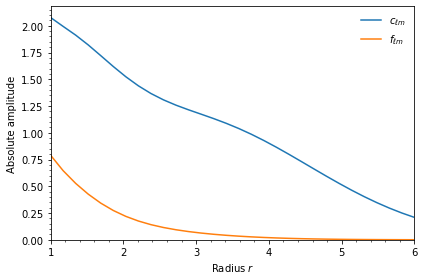

In [5]:
plt.figure(facecolor='white')

def radial(r, kappa):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

def hyd_1s(r):
    return 1/np.sqrt(np.pi) * np.exp(-r)

sgn, l, m = 0,0,0
#plt.plot(r_lst, np.array([output.eval_orbital_spherical(r, np.pi/2, 0) for r in r_lst])*100, label=r'$\psi_0$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])/radial(r_lst, kappa), label=r'$c_{\ell m}$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m]),  label=r'$f_{\ell m}$')
plt.legend(frameon=False)
plt.xlabel(r'Radius $r$')
plt.ylabel(r'Absolute amplitude')
plt.minorticks_on()
plt.xlim(r_lst[0], r_lst[-1])
plt.ylim(bottom=0)
plt.tight_layout()

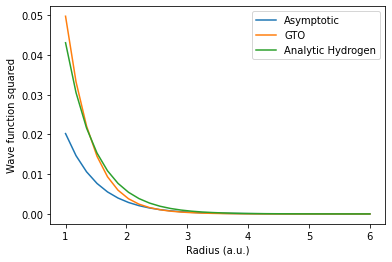

In [6]:
clm_array = se.get_as_coeffs(output.eval_orbital_spherical, 2.5, 30, Ip)

phi = 0
theta = 0

plt.figure(facecolor='white')
plt.plot(r_lst, np.abs(se.eval_asymptotic(r_lst, theta, phi, clm_array, Ip))**2, label='Asymptotic')
plt.plot(r_lst, np.abs(output.eval_orbital_spherical(r_lst, theta, phi))**2, label='GTO')
plt.plot(r_lst, np.abs(hyd_1s(r_lst))**2, label='Analytic Hydrogen')
plt.legend()
plt.xlabel('Radius (a.u.)')
plt.ylabel('Wave function squared')
plt.show()

In [7]:
#dp = 4./250
#pzList = np.arange(-1.7, 1.7, dp)
#pxList = np.arange(0, 1.7, dp)

N = 10
pzList = np.linspace(-1.7, 1.7, 2*N)
pxList = np.linspace(0, 1.7, N)
pzGrid, pxGrid = np.meshgrid(pzList, pxList)
py = 0.

M_grid = np.array(pool.starmap(SP.M_asymp_xz_list, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array))))

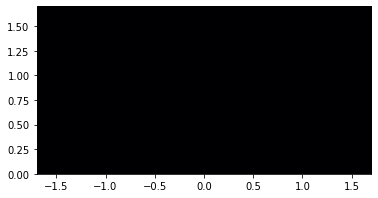

In [8]:
M2_grid = np.abs(M_grid)**2

plt.imshow(np.flip(M2_grid,0), extent = (np.amin(pzList), np.amax(pzList), np.amin(pxList), np.amax(pxList)),
           cmap='inferno', #norm=LogNorm(vmin=MMaxs[i]*1e-6, vmax=MMaxs[i]),
           interpolation = 'bicubic', aspect = 1.)

In [9]:
M_grid

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
   